# EDA

In [ ]:
import glob
glob.glob("open/train_target/*")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
pd.set_option('display.max_columns', 50)

In [2]:
def input_df(num):
#     data = pd.read_csv(f'./open/train_input/CASE_{str(num).zfill(2)}.csv')
    data = pd.read_csv(f'./save/CASE_{str(num).zfill(2)}.csv')
    return data
dfs=[input_df(i) for i in range(0,58)]

In [ ]:
def target_df(num):
    data = pd.read_csv(f'./open/train_target/CASE_{str(num).zfill(2)}.csv')
    return data
targets=[target_df(i) for i in range(1,59)]

In [ ]:
def search_missing_value(no):
    df = dfs[no]
    mv = df.isnull().sum().sum()
    print(f"{no+1}번의 결측치: {mv}, {mv/37}")

In [ ]:
for i in range(0, 58):
    search_missing_value(i)

In [ ]:
def make_date_column(df):
    df["날짜"] = df["시간"].str[5:10]

In [ ]:
def make_time_column(df):
    df["시각"] = df["시간"].str[11:13]

In [ ]:
def make_minuete_column(df):
    df["분"] = df["시간"].str[14:16]

In [ ]:
def make_col_name_same(df):
    colname = dfs[0].columns.tolist()
    df.columns = colname

In [ ]:
for df in dfs:
#     make_date_column(df)
    make_time_column(df)
#     make_minuete_column(df)
#     make_col_name_same(df)

In [ ]:
def drop_columns(df):
    del df['Unnamed: 0']

In [ ]:
for df in dfs:
    drop_columns(df)

In [ ]:
import tqdm

def fillnabytime(df, col, on='시각'):
    """
    col의 결측치를 시간대별 평균값으로 넣어준다.
    """
    mean = df[[on, col]].groupby(on).mean()
    idxs = df[df[col].isnull()].index
    for index in idxs:
        df.loc[index, col] = float(mean.loc[df.loc[index, on]])

        
cols = dfs[0].columns[1:-2]
for df in (dfs):
    for col in cols:
        fillnabytime(df,col)

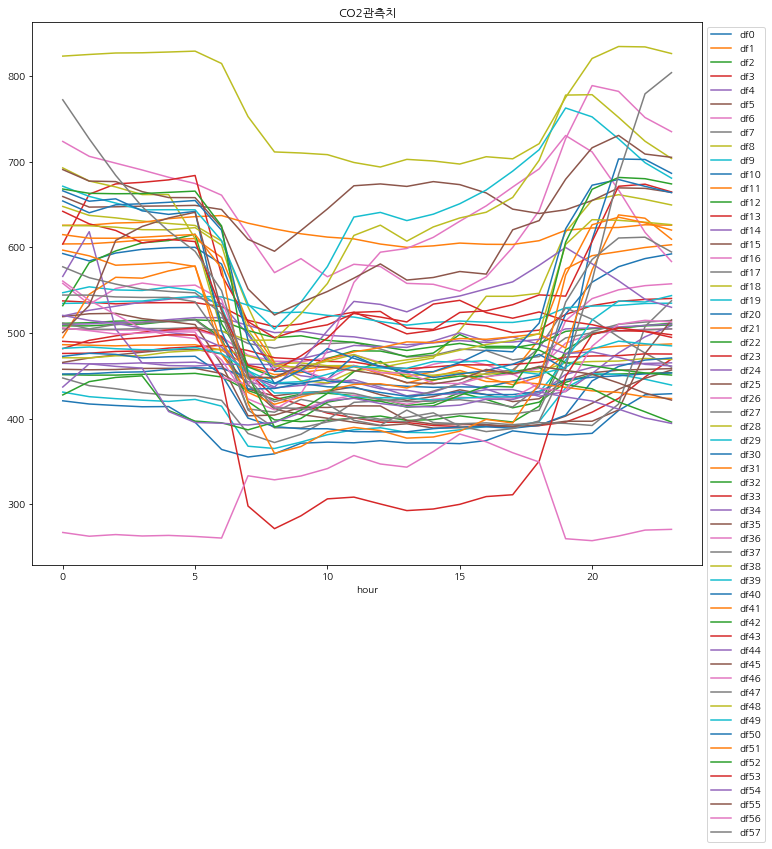

In [154]:
cols = dfs[0].columns[1:-2]
def check_col_hourly_trend(col_name):
    plt.figure(figsize=(12,10))
    for no, df in enumerate(dfs):
        
        df['시간'] = pd.to_datetime(df['시간'])
        df['hour'] = df['시간'].dt.hour
        df = df.drop(columns = ['시간'])
        df = df.groupby('hour').agg('mean')
        
        
        df[col_name].plot(label=f"df{no}")
    
        plt.legend(bbox_to_anchor=(1,1))
        plt.title(col_name)

check_col_hourly_trend(cols[3])

In [ ]:
cols = dfs[0].columns.tolist()
# cols.remove("시간")

In [ ]:
for colname in cols[1:-2]:
    check_col_hourly_trend(colname) 

# feature engineering

In [ ]:
for num in range(0, 58):
    dfs[num].to_csv(f"./save/CASE_{str(num).zfill(2)}.csv")

## 이상치 제거

In [ ]:
def show_describe(no, col):
    if no != 9:
        for i in range(0, 6):
            print(f"df[{no + (10*i)}]: {dfs[no + (10*i)][col].describe()}")
    else:
        for i in range(0, 5):
            print(f"df[{no + (10*i)}]: {dfs[no + (10*i)][col].describe()}")

In [ ]:
show_describe(9, '펌프상태')

In [3]:
feature_names = ['시간','내부온도관측치','내부습도관측치','CO2관측치','EC관측치','펌프상태', '최근분무량', '내부유동팬상태', '외부환기팬상태', '난방부하', '냉방부하', '백색광추정광량', '적색광추정광량', '청색광추정광량']


In [5]:
def show_max(col):
    for no, df in enumerate(dfs):
        print([f"df{no}, {df[col].max()}"])


In [6]:
def remove_outlier(no, col):
    outlier_idx = dfs[no][col].idxmax()
    dfs[no].loc[outlier_idx, col] = np.nan
    dfs[no][col] = dfs[no][col].fillna(method='pad')
    return dfs[no][col].describe()

In [95]:
def change_max(no, col):
    dfs[no].loc[dfs[no][col] == dfs[no][col].max(), col] = dfs[no][col].quantile(.75)
    return dfs[no][col].describe()

In [168]:
show_max('냉방부하')

['df0, 37.596']
['df1, 61.0000038146972']
['df2, 63.5000038146972']
['df3, 88.9999961853027']
['df4, 85.0']
['df5, 78.5000038146972']
['df6, 100.0']
['df7, 90.0']
['df8, 50.89452468']
['df9, 25.5000019073486']
['df10, 403.5995']
['df11, 16.9999980926513']
['df12, 16.9999980926513']
['df13, 85.50000191']
['df14, 58.00000190734863']
['df15, 47.5']
['df16, 63.99999618530273']
['df17, 35.0']
['df18, 89.50000762939453']
['df19, 72.13839262974722']
['df20, 75.4688024652778']
['df21, 66.49999618530273']
['df22, 74.0139294122721']
['df23, 52.8569424283583']
['df24, 68.1364737894693']
['df25, 39.49999809']
['df26, 73.9999961853027']
['df27, 75.0']
['df28, 66.2083709910861']
['df29, 57.36987181']
['df30, 36.33354157']
['df31, 66.00000381']
['df32, 63.99999619']
['df33, 60.50000191']
['df34, 51.49999619']
['df35, 86.99999809']
['df36, 92.76187846']
['df37, 93.00000191']
['df38, 87.69706567']
['df39, 93.08356663']
['df40, 68.99999619']
['df41, 63.51246384']
['df42, 95.49999237']
['df43, 31.4999961

In [176]:
dfs[10]['냉방부하'].describe()

count    57600.000000
mean        96.007036
std        153.561883
min          0.000000
25%          0.000000
50%         10.500002
75%        121.051500
max        403.599500
Name: 냉방부하, dtype: float64

In [136]:
change_max(, '외부환기팬상태')

count    37440.000000
mean        98.745903
std         98.769654
min          0.000000
25%          0.000000
50%         66.657612
75%        201.000000
max        201.000000
Name: 외부환기팬상태, dtype: float64

In [87]:
remove_outlier(16, '최근분무량')

count    36000.000000
mean       115.213697
std         32.893519
min          0.000000
25%        119.570000
50%        126.000000
75%        126.000000
max        126.000000
Name: 최근분무량, dtype: float64

In [ ]:
show_max(0, 'EC관측치')

In [ ]:
remove_outlier(10, 'EC관측치')

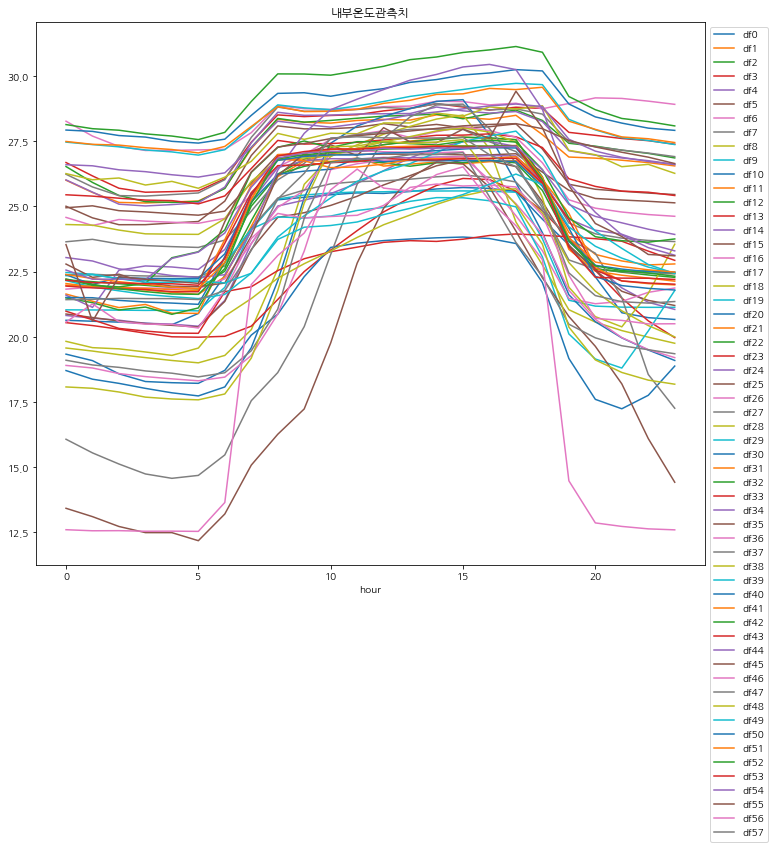

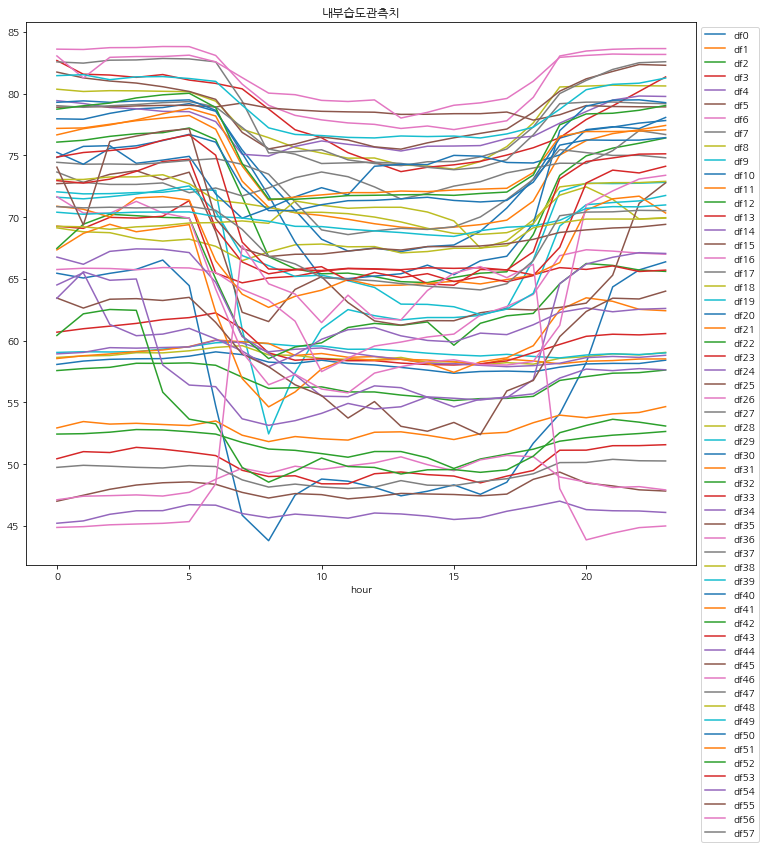

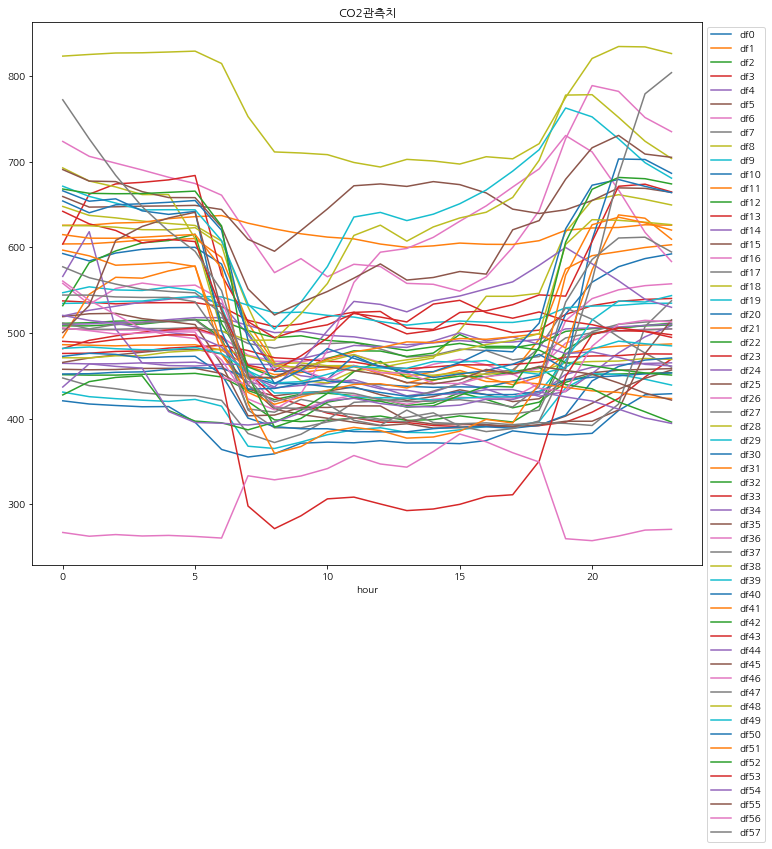

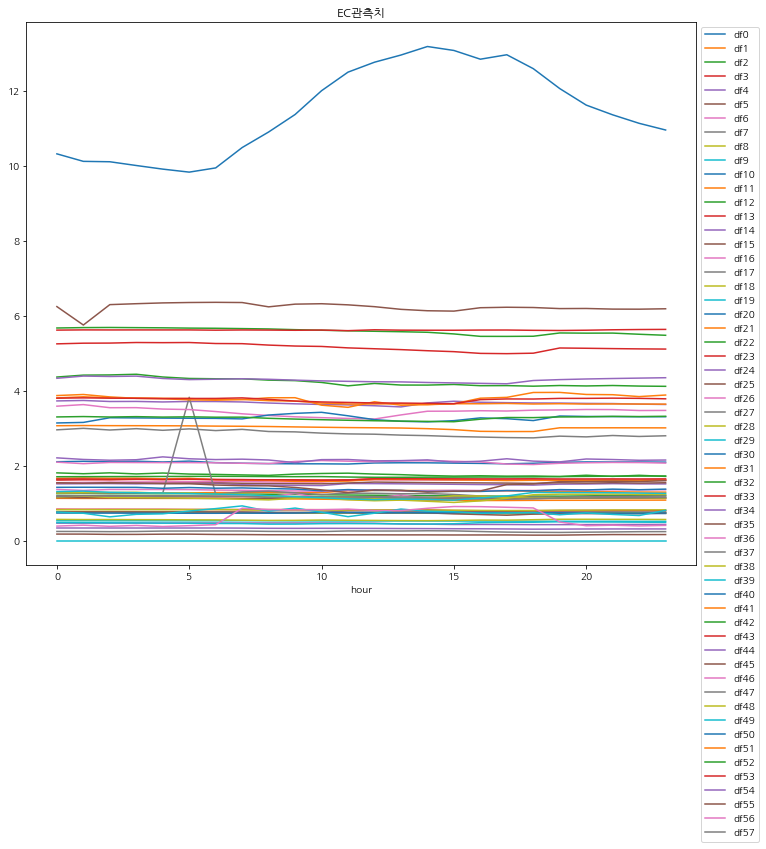

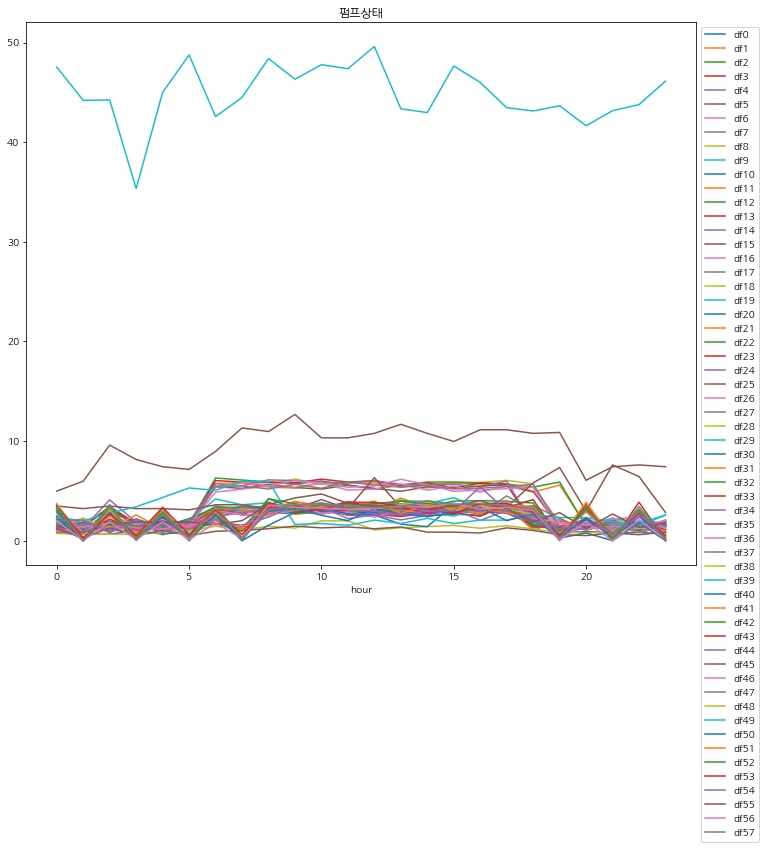

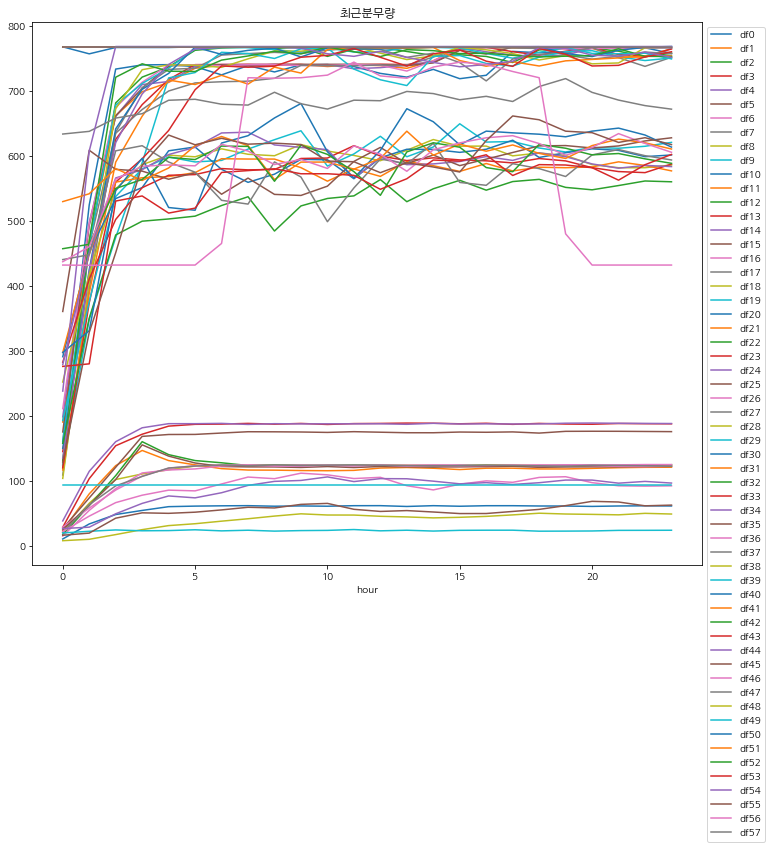

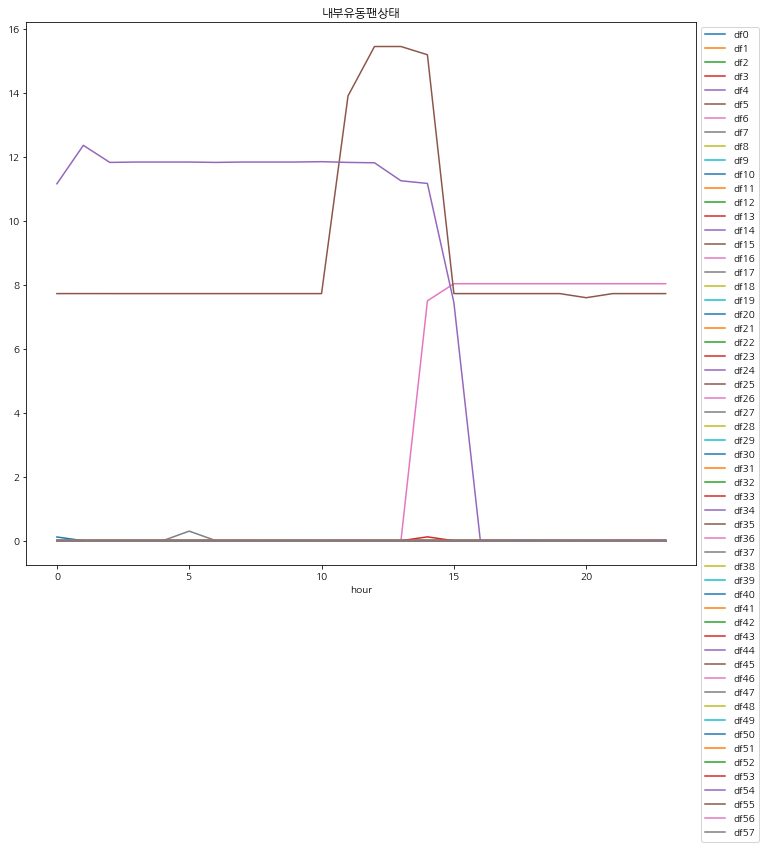

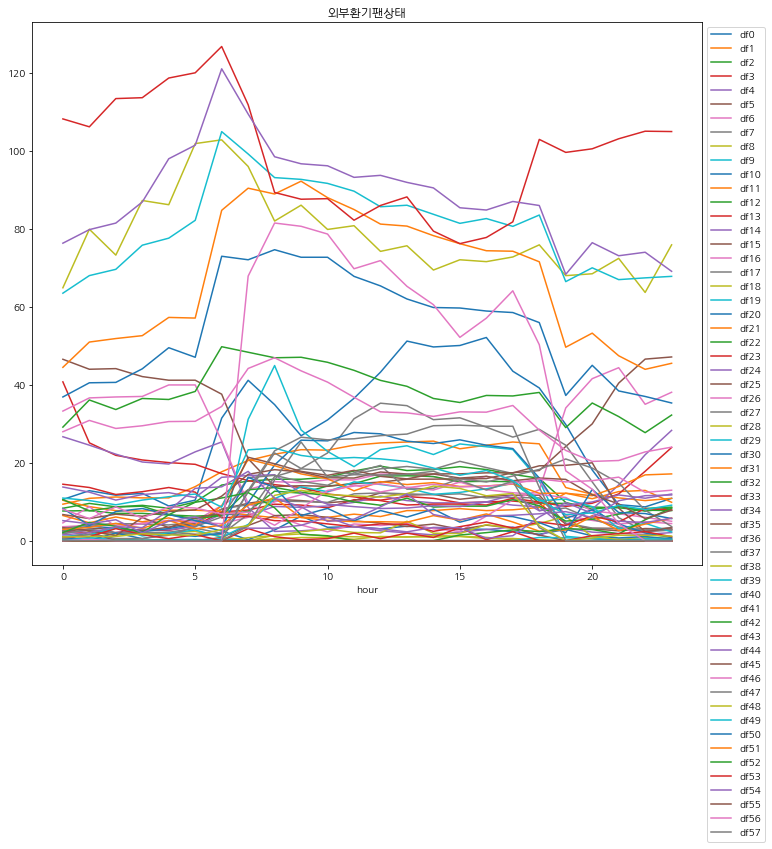

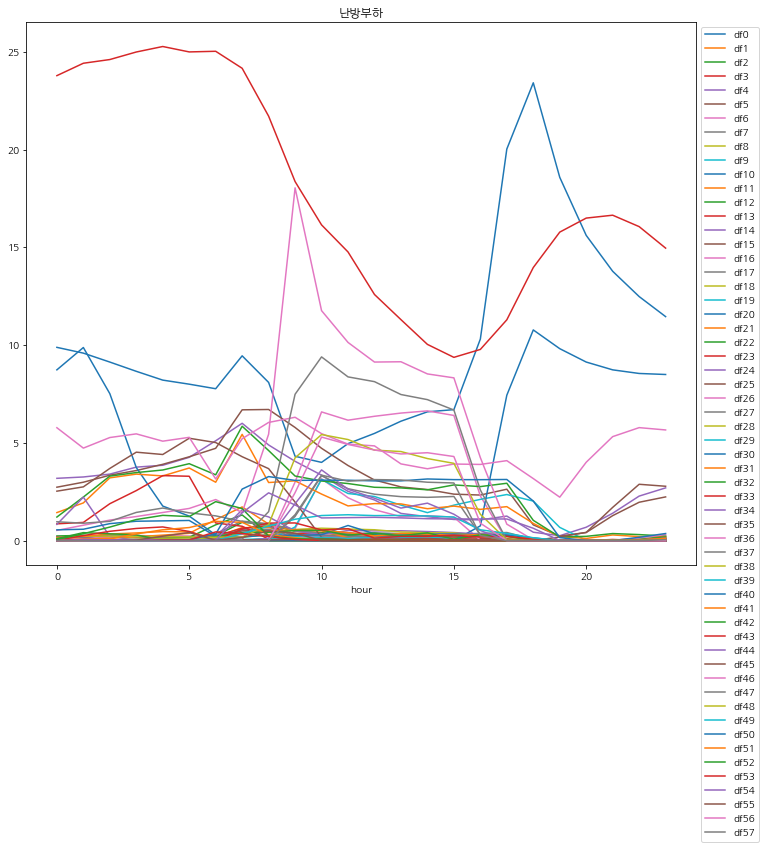

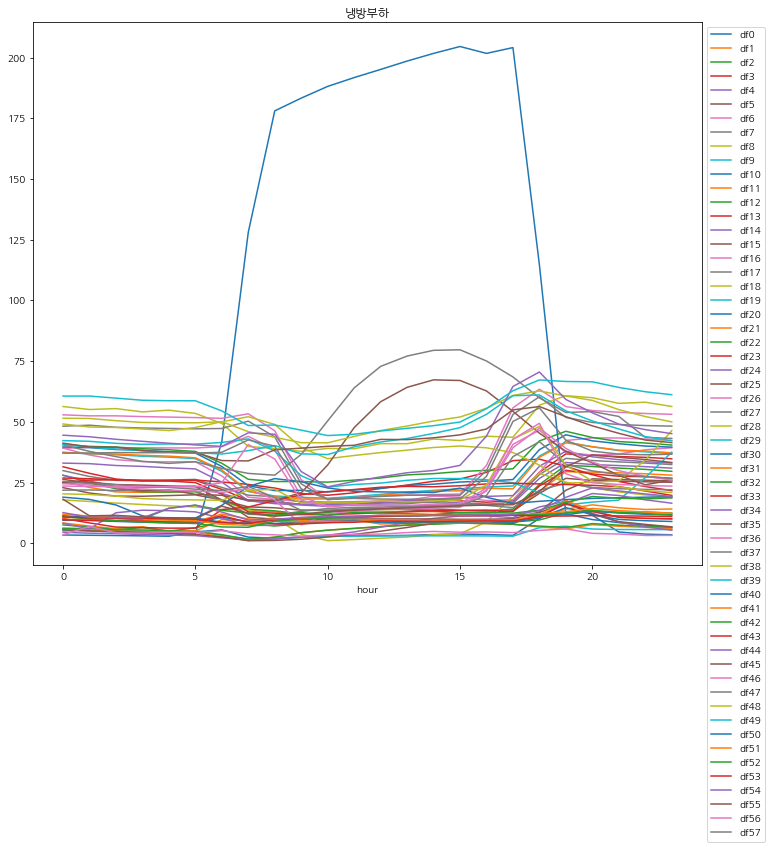

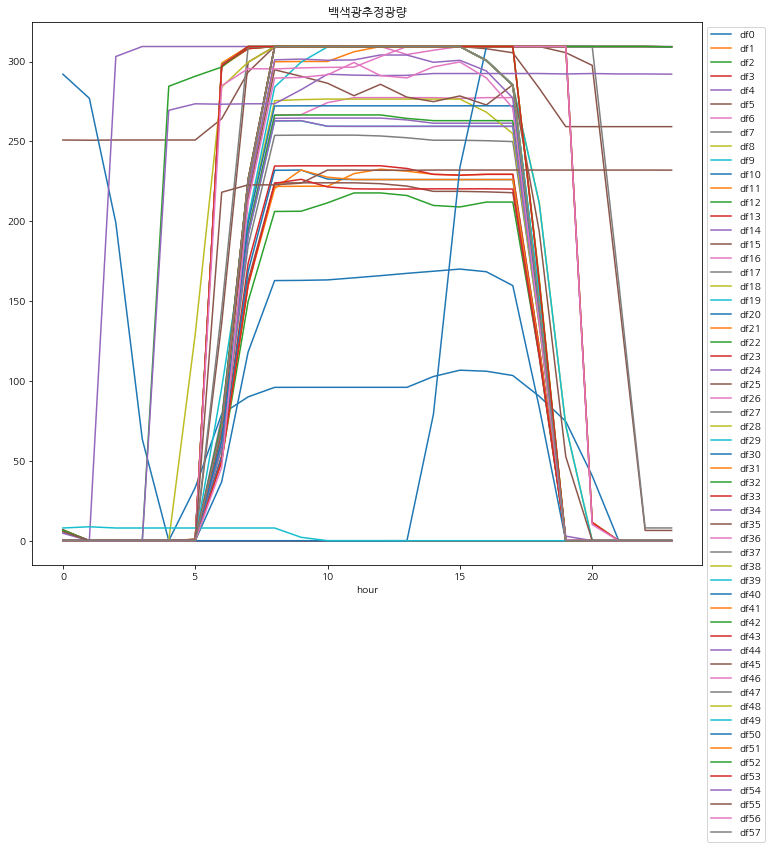

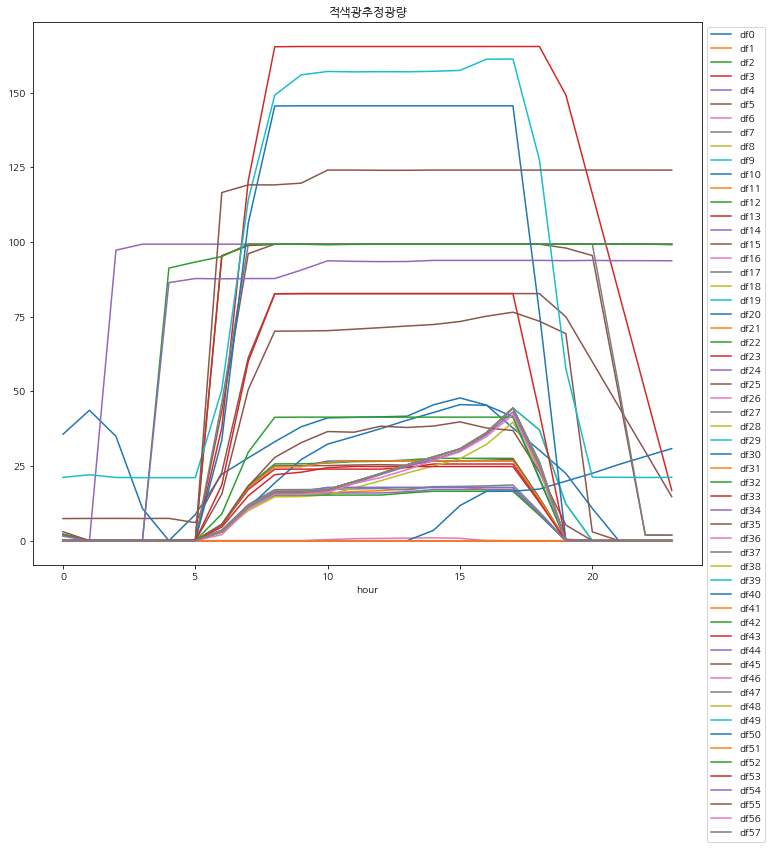

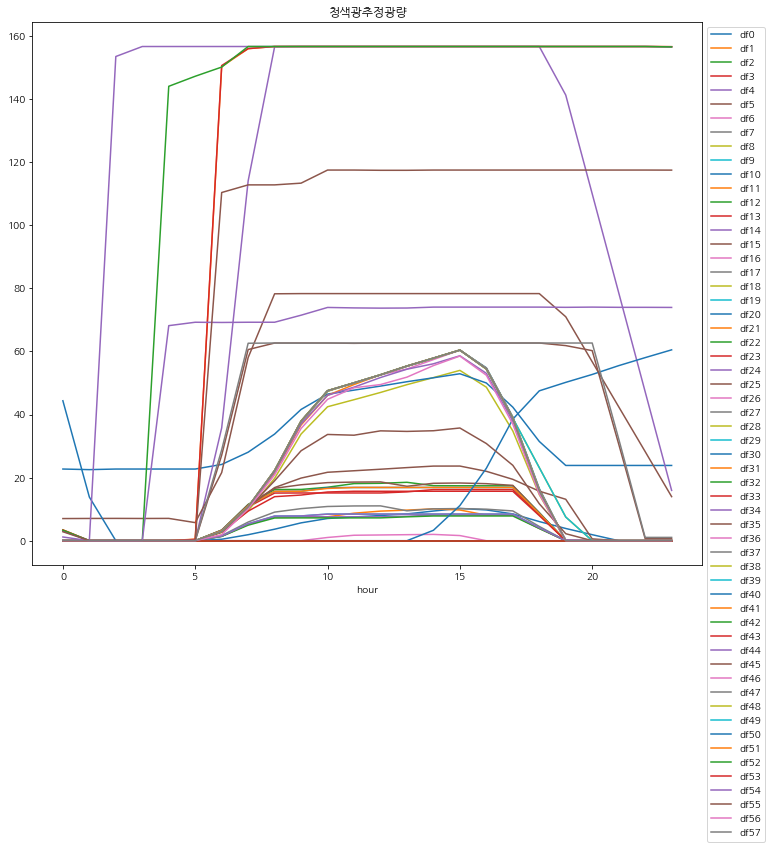

In [158]:
for cols in feature_names[1:]:
    check_col_hourly_trend(cols)

## 외부 온도, 습도 전체 결측치인 데이터 채워주기 

### 외부온도관측치 nan인 list

In [ ]:
def search_df(no, nanlist):
    if np.isnan(dfs[no]['외부온도관측치'].max()):
#         print(no)
        nanlist.append(no)
    return nanlist

In [ ]:
nanlist = []
for no in range(0, 58):
    search_df(no, nanlist)

In [ ]:
nanlist

### 내부, 외부 온도 관측치에 관계가 있는지?

In [ ]:
dfs[4][['내부온도관측치', '외부온도관측치', '시각']].groupby("시각").agg('mean').plot()

In [ ]:
for no, df in enumerate(dfs):
    display(no, df[['내부온도관측치', '외부온도관측치']].corr().min())

In [ ]:
sum = 0
num = 0
for df in dfs:
    if not np.isnan(df['외부온도관측치'].mean()):
        sum += df['외부온도관측치'].mean()
        num += 1
sum/num

In [ ]:
sum = 0
num = 0
for df in dfs:
    if not np.isnan(df['외부습도관측치'].mean()):
        sum += df['외부습도관측치'].mean()
        num += 1
sum/num

In [ ]:
for i in nanlist:
    dfs[i]['외부온도관측치'] = 24.352579112580255
    dfs[i]['외부습도관측치'] = 35.49348003067175

In [ ]:
df.columns

In [ ]:
set(dfs[9]['냉방상태'].tolist())

In [ ]:
valid_cols = ['내부온도관측치', '내부습도관측치', 'CO2관측치', 
             'EC관측치','외부온도관측치', '외부습도관측치',
       '펌프상태', '난방상태',
       '난방작동남은시간', '화이트 LED동작강도', '레드 LED동작강도',
             '블루 LED동작강도','냉방온도',
       '난방온도', '기준온도', '총추정광량', '백색광추정광량', '적색광추정광량' ]

In [ ]:
dfs[0][valid_cols]

## model 돌리기 위한 작업

In [ ]:
def input_df(num):
#     data = pd.read_csv(f'./open/train_input/CASE_{str(num).zfill(2)}.csv')
    data = pd.read_csv(f'./column/CASE_{str(num).zfill(2)}.csv')
    return data
dfs=[input_df(i) for i in range(0,58)]

In [159]:
for no, df in enumerate(dfs):
    df[feature_names].to_csv(f"./column/CASE_{str(no).zfill(2)}.csv", index=False)

In [ ]:
def test_input(num):
    data = pd.read_csv(f'./open/test_input/TEST_{str(num).zfill(2)}.csv')
#     data = pd.read_csv(f'./column/CASE_{str(num).zfill(2)}.csv')
    return data
test=[test_input(i) for i in range(1,7)]

In [ ]:
def make_col_name_same(df):
    colname = test[0].columns.tolist()
    df.columns = colname

for tests in test:
    make_col_name_same(tests)

In [ ]:
for no, df in enumerate(test):
    df[valid_cols].to_csv(f"./test/TEST_{str(no).zfill(2)}.csv", index=False)

In [179]:
import zipfile
       
df_zip = zipfile.ZipFile('./csv.zip', 'w')
for num in range(0, 57):
    df_zip.write(f'./column/CASE_{str(num).zfill(2)}.csv', compress_type=zipfile.ZIP_DEFLATED)

df_zip.close()

# Simple LSTM

In [ ]:
import random
import pandas as pd
import numpy as np
import os
import glob

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
CFG = {
    'EPOCHS':5,
    'LEARNING_RATE':1e-3,
    'BATCH_SIZE':16,
    'SEED':41
}

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
all_input_list = sorted(glob.glob('./column/*.csv'))
all_target_list = sorted(glob.glob('./open/train_target/*.csv'))

In [ ]:
train_input_list = all_input_list[:50]
train_target_list = all_target_list[:50]

val_input_list = all_input_list[50:]
val_target_list = all_target_list[50:]

In [ ]:
def fill_na(df):
    df = df.fillna(method='pad')
    return df

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_paths, target_paths, infer_mode):
        self.input_paths = input_paths
        self.target_paths = target_paths
        self.infer_mode = infer_mode
        
        self.data_list = []
        self.label_list = []
        print('Data Pre-processing..')
        for input_path, target_path in tqdm(zip(self.input_paths, self.target_paths)):
            input_df = pd.read_csv(input_path)
            target_df = pd.read_csv(target_path)
            
#             input_df = input_df.drop(columns=['시간'])
            input_df = input_df.fillna(0)
            
            input_length = int(len(input_df)/1440)
            target_length = int(len(target_df))
            
            for idx in range(target_length):
                time_series = input_df[1440*idx:1440*(idx+1)].values
                self.data_list.append(torch.Tensor(time_series))
            for label in target_df["rate"]:
                self.label_list.append(label)
        print('Done.')
              
    def __getitem__(self, index):
        data = self.data_list[index]
        label = self.label_list[index]
        if self.infer_mode == False:
            return data, label
        else:
            return data
        
    def __len__(self):
        return len(self.data_list)

In [ ]:
train_dataset = CustomDataset(train_input_list, train_target_list, False)
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=6)

val_dataset = CustomDataset(val_input_list, val_target_list, False)
val_loader = DataLoader(val_dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False, num_workers=6)

In [ ]:
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.lstm = nn.LSTM(input_size=18, hidden_size=256, batch_first=True, bidirectional=False)
        self.classifier = nn.Sequential(
            nn.Linear(256, 1),
        )
        
    def forward(self, x):
        
        hidden, _ = self.lstm(x)
        output = self.classifier(hidden[:,-1,:])
        return output

In [ ]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):
    model.to(device)
    criterion = nn.L1Loss().to(device)
    
    best_loss = 9999
    best_model = None
    for epoch in range(1, CFG['EPOCHS']+1):
        model.train()
        train_loss = []
        for X, Y in tqdm(iter(train_loader)):
            X = X.to(device)
            Y = Y.to(device)
            
            optimizer.zero_grad()
            
            output = model(X)
            loss = criterion(output, Y)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
                    
        val_loss = validation(model, val_loader, criterion, device)
        
        print(f'Train Loss : [{np.mean(train_loss):.5f}] Valid Loss : [{val_loss:.5f}]')
        
        if scheduler is not None:
            scheduler.step()
            
        if best_loss > val_loss:
            best_loss = val_loss
            best_model = model
    return best_model

In [ ]:
def validation(model, val_loader, criterion, device):
    model.eval()
    val_loss = []
    with torch.no_grad():
        for X, Y in tqdm(iter(val_loader)):
            X = X.float().to(device)
            Y = Y.float().to(device)
            
            model_pred = model(X)
            loss = criterion(model_pred, Y)
            
            val_loss.append(loss.item())
            
    return np.mean(val_loss)


In [ ]:
model = BaseModel()
model.eval()
optimizer = torch.optim.Adam(params = model.parameters(), lr = CFG["LEARNING_RATE"])
scheduler = None

best_model = train(model, optimizer, train_loader, val_loader, scheduler, device)


In [ ]:
test_input_list = sorted(glob.glob('./test/*.csv'))
test_target_list = sorted(glob.glob('./open/test_target/*.csv'))

In [ ]:
def inference_per_case(model, test_loader, test_path, device):
    model.to(device)
    model.eval()
    pred_list = []
    with torch.no_grad():
        for X in iter(test_loader):
            X = X.float().to(device)
            
            model_pred = model(X)
            
            model_pred = model_pred.cpu().numpy().reshape(-1).tolist()
            
            pred_list += model_pred
    
    submit_df = pd.read_csv(test_path)
    submit_df['rate'] = pred_list
    submit_df.to_csv(test_path, index=False)


In [ ]:
for test_input_path, test_target_path in zip(test_input_list, test_target_list):
    test_dataset = CustomDataset([test_input_path], [test_target_path], True)
    test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)
    inference_per_case(best_model, test_loader, test_target_path, device)

In [ ]:
test_target_list

In [ ]:
import zipfile
os.chdir("./open/test_target/")
submission = zipfile.ZipFile("../submission.zip", 'w')
for path in test_target_list:
    path = path.split('/')[-1]
    submission.write(path)
submission.close()

# Random Forest
## feature importances

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
def getDF(data, target):
    X_data = data[data.drop(["시간"],axis=1).columns]
    y_data = target['rate'].reset_index()
    
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X_data)
    y_scaled = ss.fit_transform(y_data)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3,shuffle=True)
    
    forest = RandomForestRegressor(n_estimators=100)
    forest.fit(X_train.reshape(-1, 1), y_train)
    
    return list(forest.feature_importances)
    

In [ ]:
getDF(c1, t1)